In [182]:
from mpl_toolkits import mplot3d
import numpy as np
import sys
import matplotlib.pyplot as plt


np.random.seed(40)

In [183]:
file = open("x07.txt")
learning_rate = 0.0025
max_iterations = 100
error = sys.maxsize

In [184]:
lines = file.readlines()

X = []
Y = []

for line in lines:
    var = line.split()
    var = [float(var[i]) for i in range(1,len(var)) ] 
    X.append([var[i] for i in range(len(var)-1)])
    Y.append(var[1])

In [185]:
X = np.array(X)
Y = np.array(Y)

In [186]:
w = np.random.uniform(-10,+10,(X.shape[1]))

In [187]:
for i in range(max_iterations):
    new_error = np.sum((Y-np.dot(X,w))**2)
    if (new_error<error):
        error = new_error
        learning_rate = learning_rate*1.01
    else:
        error = new_error
        learning_rate = learning_rate*0.01
    
    w = w - learning_rate*(-(np.dot(X.transpose(),Y) - np.dot(np.dot(X.transpose(),X),w)))
    if error<0:
        break
print(w)

[2.08503153 0.06279729]


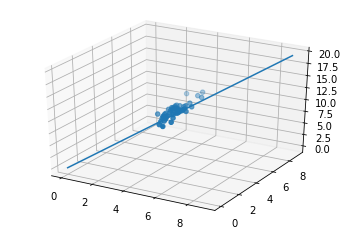

In [188]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = Y
x_line = [X[i][0] for i in range(len(X))]
y_line = [X[i][1] for i in range(len(X))]
ax.scatter3D(x_line, y_line, z_line, 'ro')

pred_x = np.arange(10).reshape(10,1)
pred_y = np.arange(10).reshape(10,1)
x = np.concatenate((pred_x,pred_y),axis=1)
pred_z = np.dot(x,w)
ax.plot3D(pred_x, pred_y, pred_z)
plt.show()